## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [2]:
! git clone https://github.com/ds3001f25/clustering_assignment.git
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 3.76 MiB/s, done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [3]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [12]:
df0_125

,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a
...,...,...,...
45,5.144996,2.890534,c
46,5.087773,3.014701,c
47,4.839512,2.880229,c
48,5.190288,2.764861,c


<Axes: xlabel='x1', ylabel='x2'>

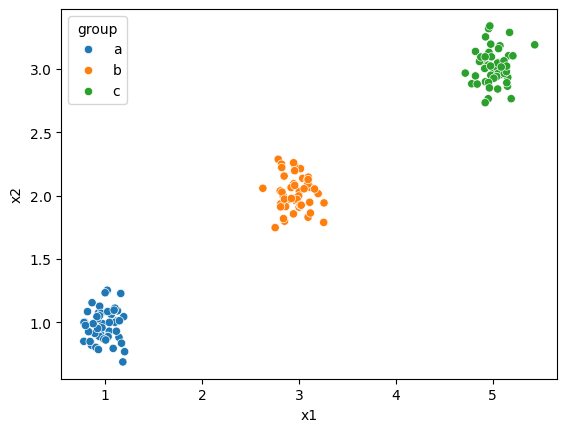

In [5]:
#Q1.2
sns.scatterplot(data=df0_125,x='x1',y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

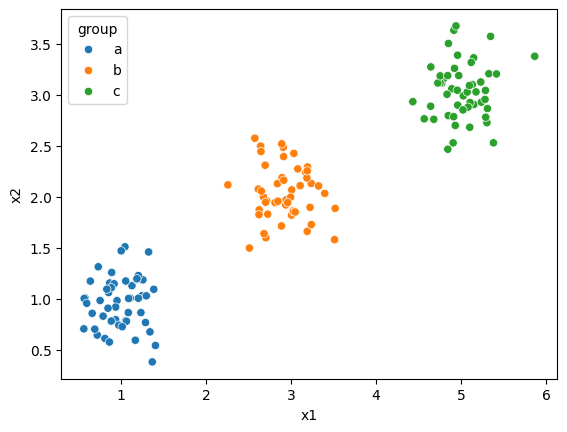

In [6]:
#Q1.2
sns.scatterplot(data=df0_25,x='x1',y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

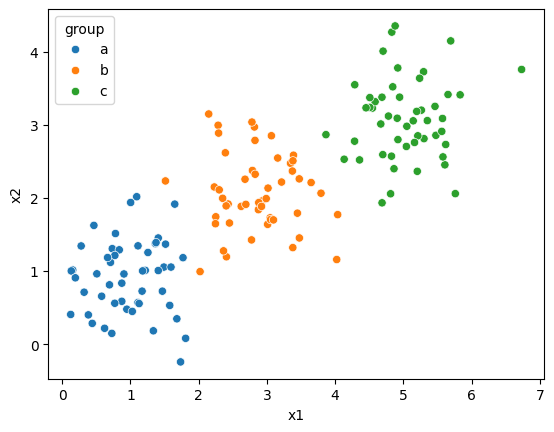

In [8]:
sns.scatterplot(data=df0_5,x='x1',y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

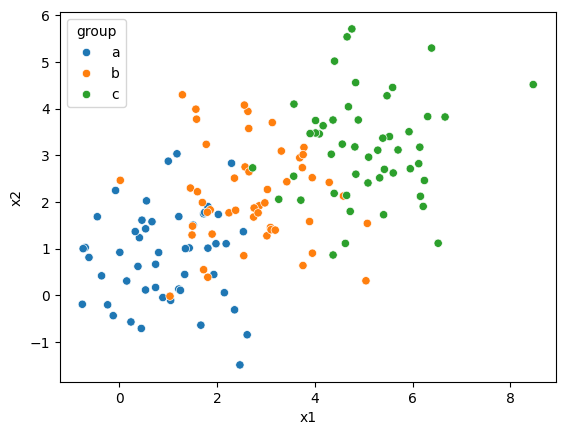

In [9]:
sns.scatterplot(data=df1_0,x='x1',y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

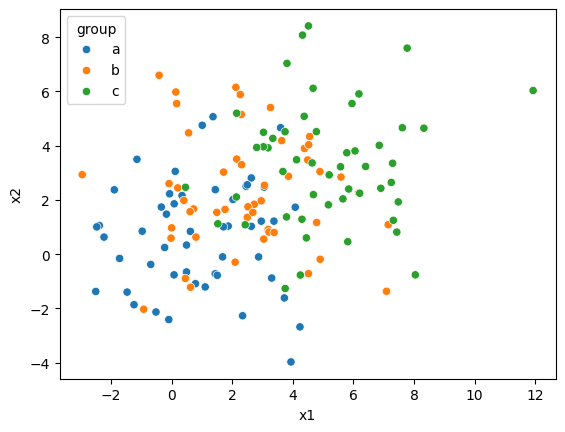

In [10]:
sns.scatterplot(data=df2_0,x='x1',y='x2', hue='group')

In [ ]:
#Q1.2
#The scatterplot points start very distinct at 0.125, but start to merge together as the number gets higher

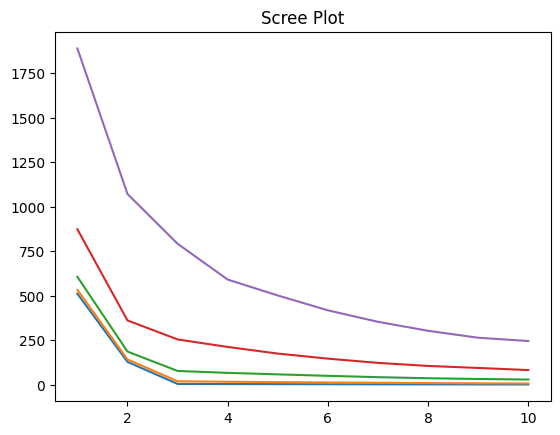

In [20]:
#Q1.3
#Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively
#select a  𝑘 . (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot for df0_125:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df0_125[['x1','x2']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

# Create a scree plot for df0_25:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df0_25[['x1','x2']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

# Create a scree plot for df0_5:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df0_5[['x1','x2']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

# Create a scree plot for df1_0:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df1_0[['x1','x2']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

# Create a scree plot for df2_0:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df2_0[['x1','x2']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

In [ ]:
#Q1.3
#As the noise gets higher, the scree plot goes up to a higher number and has a less sharp contrast. It's still clear where the elbow is, but gets progressively less clear.

In [ ]:
#Q1.4: #Explain the intuition of the elbow, using this numerical simulation as an example.
#Here the elbow helps us see how much benefit we are getting by adding more clusters. As you can see by the scree plot of df2_0, the value of the SSE goes from about 1800 to
#about 1100 as the number of clusters went from 1 to 2, a difference of about #700. Then, from 2 to 3 clusters, the SSE went from about 1100 to about 600, a difference of about 500.
#After this, the plot really starts to flatten and you can see there isn't much marginal benefit from adding more clusters. So, the elbow gives us the intuition of where we can stop
#adding clusters to get improvement.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [42]:
pd.read_csv('clustering_assignment/data/2022 election cycle fundraising.csv')

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0
...,...,...,...,...,...,...,...,...,...
532,532,William Timmons,Republican,South Carolina,House,"$892,064","$823,955","$76,799","$391,742"
533,533,Young Kim,Republican,California,House,"$7,900,497","$7,380,035","$928,803","$94,940"
534,534,Yvette Clarke,Democratic,New York,House,"$684,268","$662,375","$93,513","$49,480"
535,535,Yvette Herrell,Republican,New Mexico,House,"$3,777,731","$2,746,661","$1,085,613",$0


In [34]:
#Q2.1
df = pd.read_csv('clustering_assignment/data/2022 election cycle fundraising.csv')
df_numbers = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]
for each in df_numbers.columns:
    df_numbers[each] = df_numbers[each].str.replace('$', '')
    df_numbers[each] = df_numbers[each].str.replace(',', '')
    df_numbers[each] = pd.to_numeric(df_numbers[each])
df_numbers

/tmp/ipython-input-3723150700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers[each] = df_numbers[each].str.replace('$', '')
/tmp/ipython-input-3723150700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers[each] = df_numbers[each].str.replace(',', '')
/tmp/ipython-input-3723150700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Raised,Spent,Cash on Hand,Debts
0,7719396,7449678,851851,0
1,2192741,1243502,2472888,0
2,20993041,13957854,20942888,0
3,1211111,1173466,623472,0
4,1617611,1664674,1098579,0
...,...,...,...,...
532,892064,823955,76799,391742
533,7900497,7380035,928803,94940
534,684268,662375,93513,49480
535,3777731,2746661,1085613,0


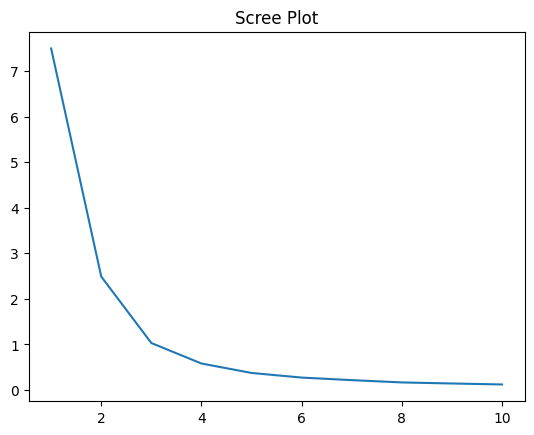

In [53]:
#Q2.2: Max-min normalize Raised and Spent. Use a scree plot to determine the optimal number of clusters for the  𝑘  means clustering algorithm.

from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

df_numbers['Raised'] = maxmin(df_numbers['Raised'])
df_numbers['Spent'] = maxmin(df_numbers['Spent'])

# Create a scree plot for Raised and Spent:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df_numbers[['Raised', 'Spent']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

<Axes: xlabel='Raised', ylabel='Spent'>

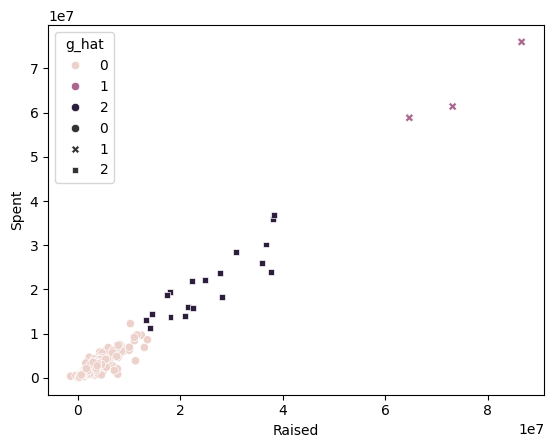

In [40]:
#Q2.2
#There is a steep drop off from 1 to 2, but also from 2-3. I would therefore argue k=3 is the optimal k-value based on the Scree Plot

#Make a scatter plot of Raised against Spent and hue the dots by their cluster membership.
## Optimal clustering:
df = pd.read_csv('clustering_assignment/data/2022 election cycle fundraising.csv')
kstar = 3
model = KMeans(n_clusters=kstar, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(df_numbers) # Fit the model
g_hat = model.labels_
df['g_hat'] = g_hat
sns.scatterplot(x=df_numbers['Raised'], y=df_numbers['Spent'], hue=df['g_hat'], style =g_hat)


In [44]:
#Q2.2
#What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

# Count how many in each cluster
counts = df['g_hat'].value_counts()
print(counts)

# Determine the two smallest clusters by count
smallest = counts.nsmallest(2).index.tolist()
print("Smallest two cluster labels:", smallest)

# Print out the politicians in those clusters
df_small = df[df['g_hat'].isin(smallest)]
print(df_small[['Member', 'Raised', 'Spent', 'g_hat']])

#There are not many politicians in CLuster 1, which are to the top right. Only Mark Kelly, Raphael Warnock, and Val Demings are in this category
#The second smallest cluster is Cluster 2, which has moderate funding and spending. Printed Below is a list that includes the politicians in both
#Clusters 1 and 2.

g_hat
0    515
2     19
1      3
Name: count, dtype: int64
Smallest two cluster labels: [1, 2]
                     Member       Raised        Spent  g_hat
2               Adam Schiff  $20,993,041  $13,957,854      2
45           Bernie Sanders  $14,074,831  $11,331,428      2
87   Catherine Cortez Masto  $37,993,811  $35,928,936      2
89            Chuck Schumer  $35,899,966  $25,944,350      2
115            Dan Crenshaw  $14,535,870  $14,512,435      2
261            John Kennedy  $28,119,082  $18,276,565      2
290            Katie Porter  $21,441,693  $15,946,876      2
298          Kevin McCarthy  $24,791,538  $22,086,344      2
326           Maggie Hassan  $30,914,830  $28,380,992      2
328             Marco Rubio  $36,709,285  $30,153,111      2
340              Mark Kelly  $73,140,886  $61,357,281      1
357          Michael Bennet  $18,086,343  $13,713,611      2
390            Nancy Pelosi  $22,216,583  $21,814,643      2
402            Patty Murray  $13,377,243  $13,073,2

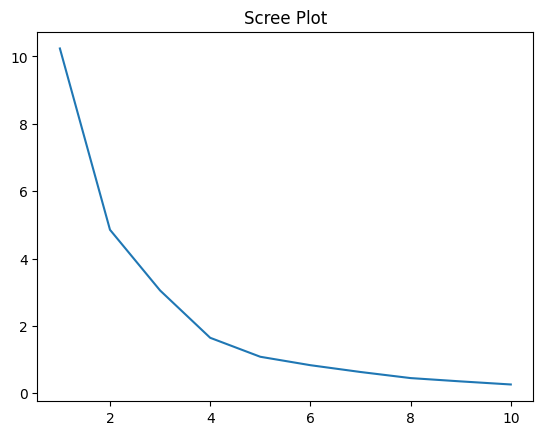

In [54]:
#Q2.3
#Repeat part 2, but for Cash on Hand and Debts. Compare your results with part 2.
#Why might this be? If necessary, look up some of these races to see how close they were

df_numbers['Cash on Hand'] = maxmin(df_numbers['Cash on Hand'])
df_numbers['Debts'] = maxmin(df_numbers['Debts'])

# Create a scree plot for Cash on Hand and Debts:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df_numbers[['Cash on Hand', 'Debts']]) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

<Axes: xlabel='Cash on Hand', ylabel='Debts'>

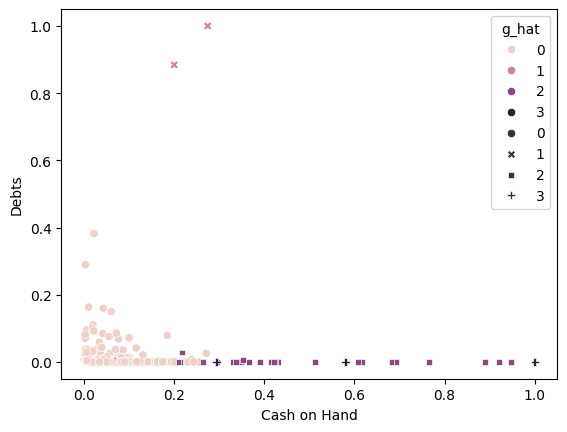

In [56]:
#Q2.3
#There is a steep drop off from 1 to 2, but also from 2-3. I would therefore argue k=4 is the optimal k-value based on the Scree Plot

#Make a scatter plot of Cash on Hand against Debts and hue the dots by their cluster membership.
## Optimal clustering:
df = pd.read_csv('clustering_assignment/data/2022 election cycle fundraising.csv')
kstar = 4
model = KMeans(n_clusters=kstar, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(df_numbers) # Fit the model
g_hat = model.labels_
df['g_hat'] = g_hat
sns.scatterplot(x=df_numbers['Cash on Hand'], y=df_numbers['Debts'], hue=df['g_hat'], style =g_hat)

In [57]:
#Q2.3
#What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
#Once again, Clustsers 1 and 3 are the smallest. I also see that in general, those who have the lowest cash on hand tend to have more debt, which makes
#sense. I again printed the list of Clusters 1 and 3

# Count how many in each cluster
counts = df['g_hat'].value_counts()
print(counts)

# Determine the two smallest clusters by count
smallest = counts.nsmallest(2).index.tolist()
print("Smallest two cluster labels:", smallest)

# Print out the politicians in those clusters
df_small = df[df['g_hat'].isin(smallest)]
print(df_small[['Member', 'Cash on Hand', 'Debts', 'g_hat']])


g_hat
0    502
2     30
3      3
1      2
Name: count, dtype: int64
Smallest two cluster labels: [1, 3]
              Member Cash on Hand        Debts  g_hat
133      David Trone   $6,206,371  $13,302,000      1
340       Mark Kelly  $13,186,127           $0      3
417  Raphael Warnock  $22,762,985           $0      3
442      Ron Johnson   $4,508,581  $11,759,857      1
523      Val Demings   $6,647,641           $0      3


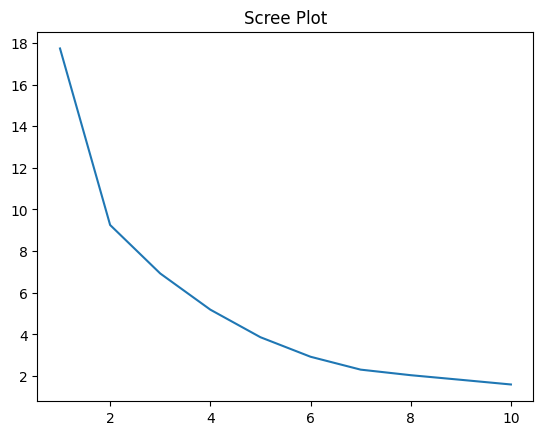

In [58]:
#Q2.4
#Use  𝑘  means clustering with all four numeric variables. How do your results compare to the previous two parts?

# Create a scree plot for all 4:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df_numbers) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

Cluster sizes (all four variables):
cluster_all
0    494
2     34
1      9
Name: count, dtype: int64


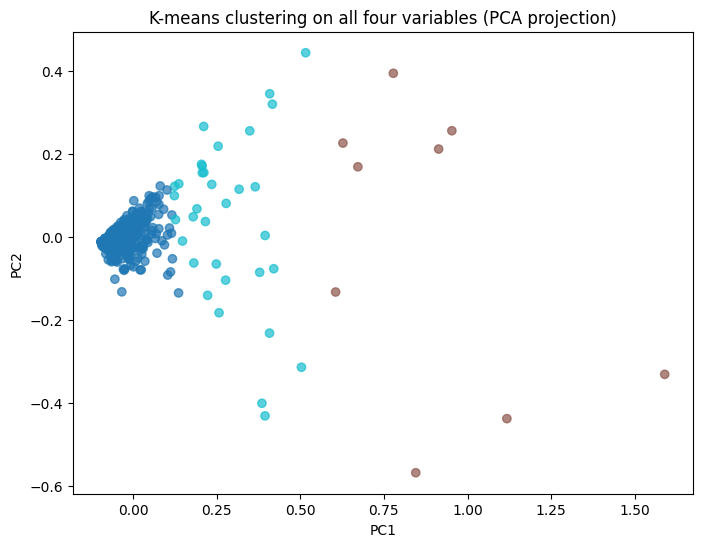

In [60]:
#There is a steep drop off from 1 to 2, but also from 2-3. However, I still think 3 is optimal.

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Run k-means clustering (using 3 clusters for consistency with earlier parts, adjust if needed)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_all'] = kmeans.fit_predict(df_numbers)

# Check cluster sizes
print("Cluster sizes (all four variables):")
print(df['cluster_all'].value_counts())

# Optional: visualize results with PCA (reduce to 2D for plotting)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_numbers)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['cluster_all'], cmap='tab10', alpha=0.7)
plt.title("K-means clustering on all four variables (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
#Q2.5
#Did the  𝑘 -MC algorithm find useful patterns for you in analyzing the election?
#Doing the k-MC algorithm with all 4 variables and then using a PCA projection was helpful because it once again showed that Cluster 0 had most of the
#values, and it was pretty dense around the same area. Then, cluster 1 had fewer, and they were less clustered. Finally, cluster 2 had the fewest, and they
#were the furthest away and the least dense. This evidence backs up my previous 2 k-Mc algorithms, which helped me to find pretty much the same results,
#helping me find patterns in the election and seeing why some races were so close and how the money affected them.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?